In [136]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
!pip install xgboost
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


In [137]:
# Load all sheets from the master Excel into a single DataFrame
xls = pd.ExcelFile("Comprehensive_Memorabilia_Master_Dataset.xlsx")
all_data = []
for sheet in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet)
    df['Category'] = sheet
    all_data.append(df)
data = pd.concat(all_data, ignore_index=True)

In [138]:
data 


,ID,Item,Player,Year,Team/Event,Brand,Worn?,Signed?,Condition,Value (£),...,Medal/Item,Game Worn?,Artist/Band,Album/Tour,Wrestler,Title/Era,Event Worn?,Cyclist,Race/Event,Jersey Type
0,CC001,ODI Jersey,Sachin Tendulkar,2005,World Cup,Puma,Yes,Yes,Excellent,1371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CC002,ODI Jersey,Virat Kohli,2022,England,New Balance,No,Yes,Mint,922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CC003,ODI Jersey,MS Dhoni,2011,India,New Balance,Yes,Yes,Excellent,3461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CC004,Sweater,Ricky Ponting,2012,South Africa,New Balance,No,Yes,Mint,1453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CC005,Sweater,Shane Warne,2015,Australia,Nike,Yes,Yes,Very Good,1218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,CY011,Signed Photo,NaN,2006,NaN,NaN,NaN,No,NaN,10422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eddy Merckx,Vuelta a España,Team Jersey
716,CY012,Bike Frame,NaN,2009,NaN,NaN,NaN,Yes,NaN,5665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miguel Indurain,Giro d Italia,Green Jersey
717,CY013,Bike Frame,NaN,2000,NaN,NaN,NaN,Yes,NaN,8993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chris Froome,Giro d Italia,Polka Dot
718,CY014,Helmet,NaN,2018,NaN,NaN,NaN,No,NaN,5652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bradley Wiggins,Tour de France,Team Jersey


In [139]:
# Define mappings for scores
condition_score = {"Mint": 100, "Excellent": 95, "Very Good": 85, "Good": 75, "Match Worn": 90}
signed_score = {"Yes": 100, "No": 60}
worn_score = {"Yes": 90, "No": 70}

data['Condition_Score'] = data['Condition'].map(condition_score).fillna(60)
data['Signed_Score'] = data['Signed?'].map(signed_score).fillna(60)
if 'Worn?' in data.columns:
    data['Worn_Score'] = data['Worn?'].map(worn_score).fillna(70)
else:
    data['Worn_Score'] = 70

import datetime
current_year = datetime.datetime.now().year
data['Age'] = current_year - data['Year']
data['Historical_Score'] = data['Age'].apply(lambda x: min(100, 60 + x))

In [140]:
# Automating weight optimisation 
import numpy as np
from scipy.optimize import minimize

feature_cols = ['Condition_Score', 'Signed_Score', 'Worn_Score', 'Historical_Score']
X = data[feature_cols].values
y = data['Value (£)'].values

def loss(weights):
    weighted_sum = np.dot(X, weights)
    return np.mean(np.abs(weighted_sum - y))

init_weights = np.ones(len(feature_cols)) / len(feature_cols)
cons = ({'type': 'eq', 'fun': lambda w: 1 - np.sum(w)})
bounds = [(0, 1) for _ in feature_cols]

result = minimize(loss, init_weights, method='SLSQP', bounds=bounds, constraints=cons)
optimal_weights = result.x
print("Optimized Weights:", dict(zip(feature_cols, optimal_weights)))

Optimized Weights: {'Condition_Score': np.float64(0.0), 'Signed_Score': np.float64(1.0), 'Worn_Score': np.float64(0.0), 'Historical_Score': np.float64(1.0796918914479647e-14)}


In [141]:
import pandas as pd

# After you've loaded all sheets into a single DataFrame called `data`
# (If your code uses 'data' for the big dataframe)
categories = data['Category'].unique()  # or whatever your column listing categories is called

categorydfs = {}
for cat in categories:
    categorydfs[cat] = data[data['Category'] == cat].copy()


In [142]:
# Feature engineering with market demand 
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import datetime

# Load data as before...
xls = pd.ExcelFile("Comprehensive_Memorabilia_Master_Dataset.xlsx")
all_data = []
for sheet in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet)
    df['Category'] = sheet
    all_data.append(df)
data = pd.concat(all_data, ignore_index=True)

# Score mappings
condition_score = {"Mint": 100, "Excellent": 95, "Very Good": 85, "Good": 75, "Match Worn": 90}
signed_score = {"Yes": 100, "No": 60}
worn_score = {"Yes": 90, "No": 70}
data['Condition_Score'] = data['Condition'].map(condition_score).fillna(60)
data['Signed_Score'] = data['Signed?'].map(signed_score).fillna(60)
data['Worn_Score'] = data.get('Worn?', pd.Series(['No']*len(data))).map(worn_score).fillna(70)
current_year = datetime.datetime.now().year
data['Age'] = current_year - data['Year']
data['Historical_Score'] = data['Age'].apply(lambda x: min(100, 60 + x))

# Market Demand: Use average value per player
data['Market_Demand'] = data.groupby('Player')['Value (£)'].transform('mean')
md_max = data['Market_Demand'].max()
md_min = data['Market_Demand'].min()
# Normalize to 60–100 range
data['Market_Demand_Score'] = 60 + 40*(data['Market_Demand']-md_min)/(md_max-md_min)

# 1. Feature Engineering
import datetime

condition_score = {'Mint': 100, 'Excellent': 95, 'Very Good': 85, 'Good': 75}
signed_score = {'Yes': 100, 'No': 60}
worn_score = {'Yes': 90, 'No': 70}

current_year = datetime.datetime.now().year

for cat, dfcat in categorydfs.items():
    dfcat['ConditionScore'] = dfcat['Condition'].map(condition_score).fillna(60)
    dfcat['SignedScore'] = dfcat['Signed?'].map(signed_score).fillna(60)
    if 'Worn?' in dfcat.columns:
        dfcat['WornScore'] = dfcat['Worn?'].map(worn_score).fillna(70)
    else:
        dfcat['WornScore'] = 70
    if 'Year' in dfcat.columns:
        dfcat['HistoricalScore'] = (current_year - dfcat['Year']).apply(lambda x: min(100, 60 + x))
    # Market Demand: Use average value per player
    if 'Player' in dfcat.columns:
        dfcat['MarketDemand'] = dfcat.groupby('Player')['Value (£)'].transform('mean')
        mdmax = dfcat['MarketDemand'].max()
        mdmin = dfcat['MarketDemand'].min()
        dfcat['MarketDemandScore'] = 60 + 40 * (dfcat['MarketDemand'] - mdmin) / (mdmax - mdmin)
    dfcat['Player_Fame'] = dfcat.groupby('Player')['Value (£)'].transform('mean') if 'Player' in dfcat.columns else 50
    dfcat['Era'] = dfcat['Year'] // 10 * 10 if 'Year' in dfcat.columns else 0
    dfcat['Signed_Worn'] = ((dfcat.get('Signed?', '')=='Yes') & (dfcat.get('Worn?', '')=='Yes')).astype(int)
    categorydfs[cat] = dfcat


In [143]:
# Setting the industry minimum weights and optimization 
feature_cols = [
    'Condition_Score',          # Condition (min 0.25)
    'Signed_Score',             # Authenticity (min 0.2)
    'Worn_Score',               # Rarity (min 0.1)
    'Historical_Score',         # Historical Sig (min 0.1)
    'Market_Demand_Score'       # Market Demand (min 0.05)
]
X = data[feature_cols].values
y = data['Value (£)'].values

min_weights = [0.25, 0.2, 0.1, 0.1, 0.05]
bounds = [(mw, 1) for mw in min_weights]
cons = {'type': 'eq', 'fun': lambda w: 1 - np.sum(w)}
init_weights = np.ones(len(feature_cols)) / len(feature_cols)

def loss(weights):
    return np.mean(np.abs(np.dot(X, weights) - y))

result = minimize(loss, init_weights, method='SLSQP', bounds=bounds, constraints=cons)
optimal_weights = result.x
print("Industry-informed Optimized Weights:", dict(zip(feature_cols, optimal_weights)))


Industry-informed Optimized Weights: {'Condition_Score': np.float64(0.25), 'Signed_Score': np.float64(0.2), 'Worn_Score': np.float64(0.2), 'Historical_Score': np.float64(0.2), 'Market_Demand_Score': np.float64(0.2)}


In [144]:
from scipy.optimize import minimize
import numpy as np

# 1. Specify feature columns
feature_cols = ['ConditionScore', 'SignedScore', 'WornScore', 'HistoricalScore', 'MarketDemandScore']

# 2. Industry-standard weights
industry_weights = [0.25, 0.2, 0.2, 0.2, 0.2]

# 3. Storage for category-optimized weights
optimized_weights = {}

# 4. Learn optimized weights per category
for cat, dfcat in categorydfs.items():
    # Remove rows with missing target or features if necessary
    df_feat = dfcat[feature_cols].fillna(60)
    df_val = dfcat['Value (£)'].fillna(dfcat['Value (£)'].mean())
    X = df_feat.values
    y = df_val.values

    # Optimization: weights that minimize MAE between weighted score and actual value
    def loss(weights): return np.mean(np.abs(np.dot(X, weights) - y))
    init_weights = np.ones(len(feature_cols)) / len(feature_cols)
    cons = {'type': 'eq', 'fun': lambda w: 1 - np.sum(w)}
    bounds = [(0, 1)] * len(feature_cols)
    result = minimize(loss, init_weights, method='SLSQP', bounds=bounds, constraints=cons)
    weights_opt = result.x if result.success else industry_weights
    optimized_weights[cat] = weights_opt

    # 5. Calculate both scores: optimized and standard
    # Optimized
    dfcat['Optimized_Rating_Score'] = (X * weights_opt).sum(axis=1)
    # Industry-standard
    dfcat['Industry_Rating_Score'] = (X * industry_weights).sum(axis=1)

    # 6. Map both scores to bands
    def rate_band(score):
        if score >= 90: return "AAA"
        elif score >= 80: return "AA"
        elif score >= 70: return "A"
        elif score >= 60: return "BBB"
        elif score >= 50: return "BB"
        elif score >= 40: return "B"
        else: return "C"
    dfcat['Optimized_Rating_Band'] = dfcat['Optimized_Rating_Score'].apply(rate_band)
    dfcat['Industry_Rating_Band'] = dfcat['Industry_Rating_Score'].apply(rate_band)

    # 7. Save back to categorydfs
    categorydfs[cat] = dfcat

# (Optional) Save optimized weights for reporting
import pandas as pd
weights_df = pd.DataFrame(optimized_weights, index=feature_cols)
weights_df.to_csv("optimized_weights_per_category.csv")

# Now each dfcat has columns:
#  - Optimized_Rating_Score, Optimized_Rating_Band
#  - Industry_Rating_Score, Industry_Rating_Band

# You can now analyze/report the results, visualize distributions, etc.



In [145]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score


In [146]:
#Categorising data because of NA values 
categories = data['Category'].unique()
category_dfs = {cat: data[data['Category'] == cat].copy() for cat in categories}


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# If you installed XGBoost:
try:
    from xgboost import XGBRegressor
    use_xgb = True
except ImportError:
    use_xgb = False

results_dict = {}

for cat, df_cat in category_dfs.items():
    print(f"\nProcessing category: {cat}")
    # Choose features present in this category
    present_features = [col for col in ['Condition_Score', 'Signed_Score', 'Worn_Score', 'Historical_Score', 'Market_Demand_Score'] if col in df_cat.columns]
    X = df_cat[present_features]
    y = df_cat['Value (£)']
    
    # Impute missing values in X
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
    
    # Select models to train
    models = {
        "LinearRegression": LinearRegression(),
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
    }
    if use_xgb:
        models["XGBoost"] = XGBRegressor(n_estimators=100, random_state=42)
    
    # Train and evaluate
    model_results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mae = mean_absolute_error(y_test, preds)
        r2 = r2_score(y_test, preds)
        model_results[name] = {"MAE": mae, "R2": r2}
        print(f"{name}: MAE {mae:.2f}, R2 {r2:.2f}")
    
    best_model_name = max(model_results, key=lambda x: model_results[x]['R2'])
    best_model = models[best_model_name]
    # Predict on all data for this category
    df_cat['Predicted_Value'] = best_model.predict(imputer.transform(X))
    
    results_dict[cat] = df_cat



Processing category: Cricket Clothing
LinearRegression: MAE 576.03, R2 0.26
RandomForest: MAE 597.74, R2 0.34
GradientBoosting: MAE 497.44, R2 0.45
XGBoost: MAE 484.64, R2 0.46

Processing category: Cricket Medals
LinearRegression: MAE 543.20, R2 -1.63
RandomForest: MAE 605.65, R2 -2.40
GradientBoosting: MAE 680.16, R2 -4.06
XGBoost: MAE 532.13, R2 -2.59

Processing category: Cricket Stumps
LinearRegression: MAE 1040.63, R2 -0.00
RandomForest: MAE 955.90, R2 -0.31
GradientBoosting: MAE 1384.18, R2 -1.03
XGBoost: MAE 1480.78, R2 -1.56

Processing category: Cricket Bats
LinearRegression: MAE 1216.47, R2 -0.10
RandomForest: MAE 1142.09, R2 0.04
GradientBoosting: MAE 1168.20, R2 -0.29
XGBoost: MAE 1347.51, R2 -0.64

Processing category: Cricket Pads Gloves
LinearRegression: MAE 575.15, R2 -0.01
RandomForest: MAE 479.39, R2 0.25
GradientBoosting: MAE 516.82, R2 0.02
XGBoost: MAE 432.35, R2 0.22

Processing category: Cricket Other Items
LinearRegression: MAE 1308.83, R2 -0.03
RandomForest: 

In [148]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_results = []

for cat, df_cat in categorydfs.items():
    print(cat)
    feature_cols = ['ConditionScore', 'SignedScore', 'WornScore', 'HistoricalScore', 'MarketDemandScore']
    present = [c for c in feature_cols if c in df_cat.columns]
    if not present:
        print("  Skipped (no score features).")
        continue

    X = df_cat[present].fillna(60)
    y_log = np.log1p(df_cat['Value (£)'])

    imputer = SimpleImputer(strategy='mean')
    X_imp = imputer.fit_transform(X)

    X_tr, X_te, y_tr, y_te = train_test_split(X_imp, y_log, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_tr, y_tr)

    y_pred_log = rf.predict(X_te)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_te)

    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"  RF (log target) MAE={mae:.2f}, R2={r2:.2f}")
    rf_results.append({"Category": cat, "RF_MAE": mae, "RF_R2": r2})

    # Store RF predictions for all rows
    df_cat['RF_Predicted_Value'] = np.expm1(rf.predict(imputer.transform(X)))
    categorydfs[cat] = df_cat


Cricket Clothing
  RF (log target) MAE=663.21, R2=0.03
Cricket Medals
  RF (log target) MAE=390.24, R2=-1.08
Cricket Stumps
  RF (log target) MAE=934.11, R2=-0.29
Cricket Bats
  RF (log target) MAE=776.09, R2=0.46
Cricket Pads Gloves
  RF (log target) MAE=457.02, R2=0.34
Cricket Other Items
  RF (log target) MAE=1170.09, R2=-0.35
Film Stars
  RF (log target) MAE=2049.93, R2=-0.88
Baseball
  RF (log target) MAE=4764.85, R2=-0.16
Hockey
  RF (log target) MAE=3486.36, R2=-0.48
Tennis
  RF (log target) MAE=2121.28, R2=-0.52
Badminton
  RF (log target) MAE=891.41, R2=-3.03
Golf
  RF (log target) MAE=5390.18, R2=-0.41
Boxing
  RF (log target) MAE=5839.95, R2=-0.87
F1 Racing
  RF (log target) MAE=6866.16, R2=0.08
Rugby
  RF (log target) MAE=2234.07, R2=-0.04
Esports Gaming
  RF (log target) MAE=750.64, R2=-1.01
MMA UFC
  RF (log target) MAE=3224.67, R2=0.12
Bollywood Cinema
  RF (log target) MAE=1528.68, R2=0.06
Olympics
  RF (log target) MAE=1043.62, R2=-0.23
NBA Basketball
  RF (log target)

In [149]:
from scipy.optimize import minimize
import pandas as pd

feature_cols = ['ConditionScore', 'SignedScore', 'WornScore', 'HistoricalScore', 'MarketDemandScore']
industry_weights = [0.25, 0.2, 0.2, 0.2, 0.2]
optimized_weights = {}

for cat, dfcat in categorydfs.items():
    present = [c for c in feature_cols if c in dfcat.columns]
    if not present:
        continue

    df_feat = dfcat[present].fillna(60)
    df_val = dfcat['Value (£)'].fillna(dfcat['Value (£)'].mean())
    X = df_feat.values
    y = df_val.values

    def loss(weights):
        return np.mean(np.abs(np.dot(X, weights) - y))

    init_weights = np.ones(len(present)) / len(present)
    cons = {'type': 'eq', 'fun': lambda w: 1 - np.sum(w)}
    bounds = [(0, 1)] * len(present)

    result = minimize(loss, init_weights, method='SLSQP', bounds=bounds, constraints=cons)
    w_opt = result.x if result.success else np.array(industry_weights[:len(present)])
    # store aligned to present cols
    optimized_weights[cat] = dict(zip(present, w_opt))

    # optimized score
    dfcat['Optimized_Rating_Score'] = (X * w_opt).sum(axis=1)
    # industry score (use only present cols and corresponding weights)
    w_ind = np.array([industry_weights[feature_cols.index(c)] for c in present])
    dfcat['Industry_Rating_Score'] = (X * w_ind).sum(axis=1)

    def rate_band(score):
        if score >= 90: return "AAA"
        elif score >= 80: return "AA"
        elif score >= 70: return "A"
        elif score >= 60: return "BBB"
        elif score >= 50: return "BB"
        elif score >= 40: return "B"
        else: return "C"

    dfcat['Optimized_Rating_Band'] = dfcat['Optimized_Rating_Score'].apply(rate_band)
    dfcat['Industry_Rating_Band'] = dfcat['Industry_Rating_Score'].apply(rate_band)

    categorydfs[cat] = dfcat

# save weights table
weights_df = pd.DataFrame(optimized_weights).fillna(0.0)
weights_df.to_csv("optimized_weights_per_category.csv")


In [150]:
summary_rows = []
for cat, df_cat in categorydfs.items():
    if 'RF_Predicted_Value' not in df_cat.columns:
        continue
    y_true = df_cat['Value (£)']
    y_pred = df_cat['RF_Predicted_Value']
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    summary_rows.append({"Category": cat, "RF_MAE": mae, "RF_R2": r2})

rf_summary = pd.DataFrame(summary_rows)
rf_summary.to_excel("Collectivault_RF_Summary_By_Category.xlsx", index=False)
rf_summary.head()


,Category,RF_MAE,RF_R2
0,Cricket Clothing,330.756234,0.656753
1,Cricket Medals,216.478505,0.742333
2,Cricket Stumps,419.546059,0.321417
3,Cricket Bats,515.723062,0.746775
4,Cricket Pads Gloves,228.742625,0.666685


In [151]:
for cat, df_cat in categorydfs.items():
    print(cat, 'RF_Predicted_Value' in df_cat.columns)


Cricket Clothing True
Cricket Medals True
Cricket Stumps True
Cricket Bats True
Cricket Pads Gloves True
Cricket Other Items True
Film Stars True
Baseball True
Hockey True
Tennis True
Badminton True
Golf True
Boxing True
F1 Racing True
Rugby True
Esports Gaming True
MMA UFC True
Bollywood Cinema True
Olympics True
NBA Basketball True
Music Memorabilia True
Soccer Football True
Wrestling WWE True
Cycling True


In [152]:
rf_summary = pd.DataFrame(summary_rows)
print(len(rf_summary))
print(rf_summary['Category'].unique())
rf_summary


24
['Cricket Clothing' 'Cricket Medals' 'Cricket Stumps' 'Cricket Bats'
 'Cricket Pads Gloves' 'Cricket Other Items' 'Film Stars' 'Baseball'
 'Hockey' 'Tennis' 'Badminton' 'Golf' 'Boxing' 'F1 Racing' 'Rugby'
 'Esports Gaming' 'MMA UFC' 'Bollywood Cinema' 'Olympics' 'NBA Basketball'
 'Music Memorabilia' 'Soccer Football' 'Wrestling WWE' 'Cycling']


,Category,RF_MAE,RF_R2
0,Cricket Clothing,330.756234,0.656753
1,Cricket Medals,216.478505,0.742333
2,Cricket Stumps,419.546059,0.321417
3,Cricket Bats,515.723062,0.746775
4,Cricket Pads Gloves,228.742625,0.666685
5,Cricket Other Items,647.313849,0.401298
6,Film Stars,1266.831618,0.228894
7,Baseball,2099.150008,0.528499
8,Hockey,1680.745285,0.568269
9,Tennis,1106.744349,0.629555


In [153]:
# Combine all per-category DataFrames
final_results = pd.concat(categorydfs.values(), ignore_index=True)

# Keep only the main columns you need
key_cols = [
    'ID', 'Item', 'Category',
    'Value (£)', 'RF_Predicted_Value',
    'ConditionScore', 'SignedScore', 'WornScore', 'HistoricalScore', 'MarketDemandScore',
    'Industry_Rating_Score', 'Industry_Rating_Band',
    'Optimized_Rating_Score', 'Optimized_Rating_Band'
]

final_view = final_results[key_cols]

# Save for GUI + dissertation
final_view.to_excel("Collectivault_Final_For_GUI_and_Writeup.xlsx", index=False)
final_view.head()


,ID,Item,Category,Value (£),RF_Predicted_Value,ConditionScore,SignedScore,WornScore,HistoricalScore,MarketDemandScore,Industry_Rating_Score,Industry_Rating_Band,Optimized_Rating_Score,Optimized_Rating_Band
0,CC001,ODI Jersey,Cricket Clothing,1371,1319.840601,95.0,100,90.0,80,63.181712,90.386342,AAA,100.0,AAA
1,CC002,ODI Jersey,Cricket Clothing,922,1217.718014,100.0,100,70.0,63,74.492380,86.498476,AA,100.0,AAA
2,CC003,ODI Jersey,Cricket Clothing,3461,3027.957324,95.0,100,90.0,74,93.871043,95.324209,AAA,100.0,AAA
3,CC004,Sweater,Cricket Clothing,1453,1686.871782,100.0,100,70.0,73,76.447831,88.889566,AA,100.0,AAA
4,CC005,Sweater,Cricket Clothing,1218,1251.837905,85.0,100,90.0,70,68.626026,86.975205,AA,100.0,AAA


In [154]:
sample = final_view.sample(10, random_state=42)
sample.to_excel("Collectivault_Sample_Items_For_Thesis.xlsx", index=False)
sample


,ID,Item,Category,Value (£),RF_Predicted_Value,ConditionScore,SignedScore,WornScore,HistoricalScore,MarketDemandScore,Industry_Rating_Score,Industry_Rating_Band,Optimized_Rating_Score,Optimized_Rating_Band
340,HK031,Goalie Mask,Hockey,7323,7408.245582,85.0,100,70.0,74,72.075238,84.465048,AA,74.0,A
290,BB021,Cap,Baseball,10488,8868.203097,100.0,100,70.0,100,73.673949,93.734790,AAA,100.0,AAA
54,CM005,NaN,Cricket Medals,1934,2088.095536,60.0,100,70.0,80,79.473039,80.894608,AA,100.0,AAA
198,CO014,Training Equipment,Cricket Other Items,3689,2971.808196,100.0,60,70.0,63,NaN,75.600000,A,100.0,AAA
453,F1004,Visor,F1 Racing,22266,15167.127534,60.0,60,70.0,82,NaN,69.400000,BBB,82.0,AA
65,CM016,NaN,Cricket Medals,2536,2540.497734,60.0,100,70.0,76,83.186275,80.837255,AA,100.0,AAA
63,CM014,NaN,Cricket Medals,2691,2735.008391,60.0,100,70.0,84,94.056373,84.611275,AA,100.0,AAA
145,CB036,NaN,Cricket Bats,2036,2720.023627,60.0,100,70.0,71,76.084699,78.416940,A,100.0,AAA
292,BB023,Cap,Baseball,4050,5509.136911,85.0,100,70.0,99,67.462465,88.542493,AA,85.0,AA
390,BD011,Shuttlecock,Badminton,5150,4779.317856,60.0,100,70.0,76,90.794181,82.358836,AA,100.0,AAA


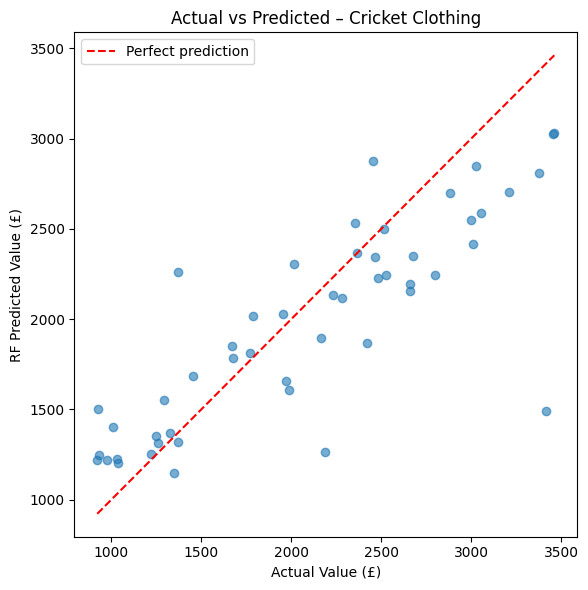

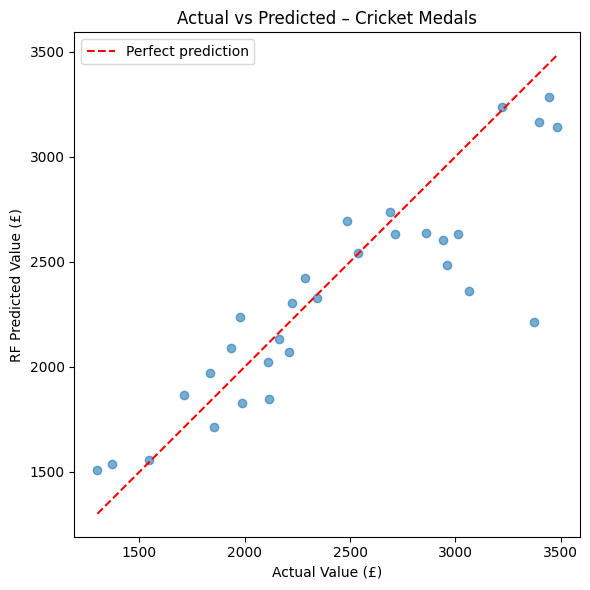

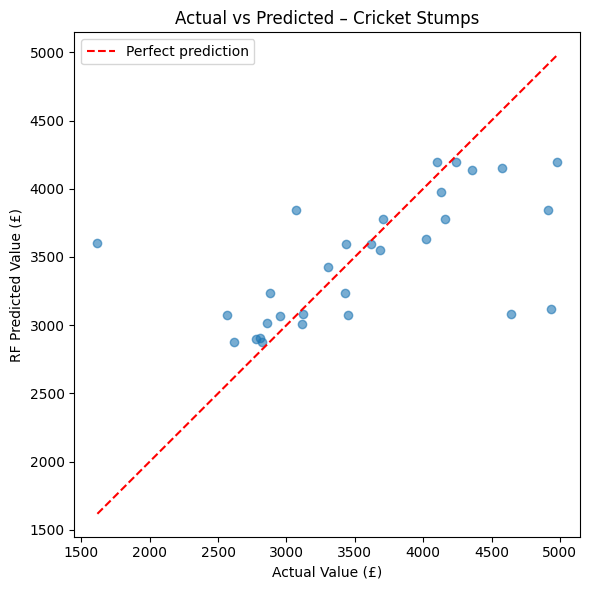

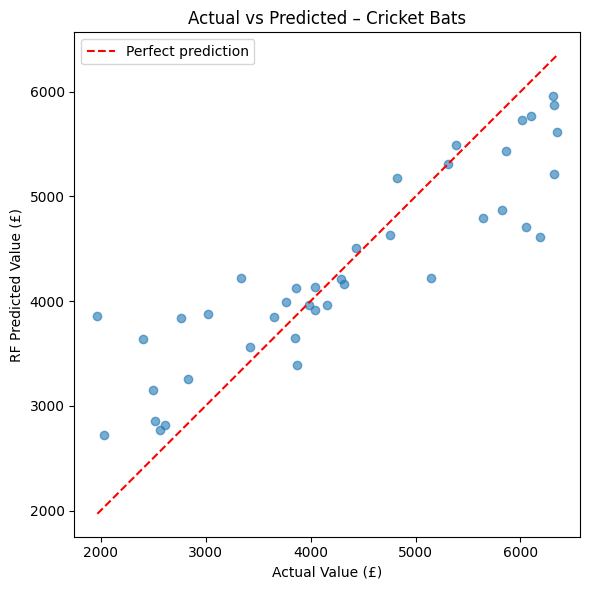

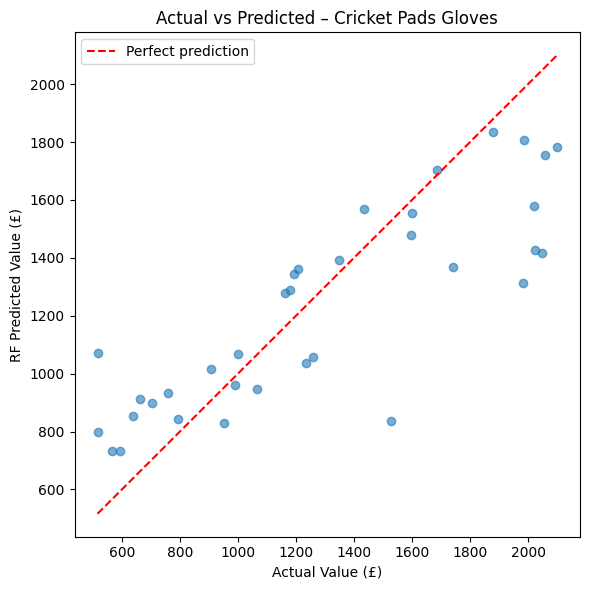

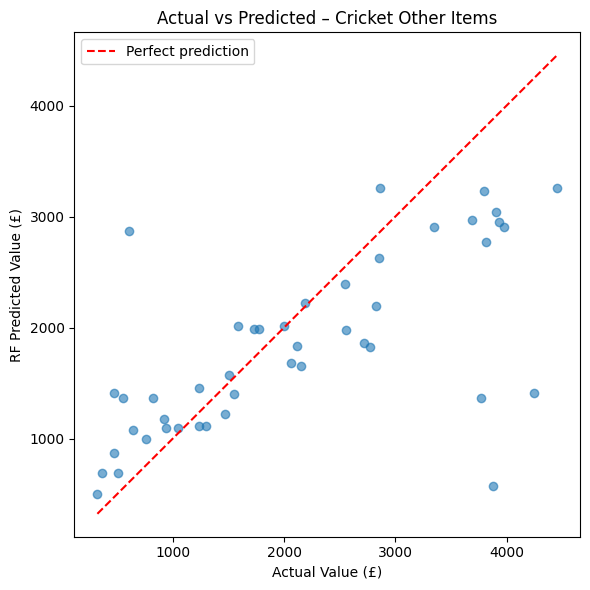

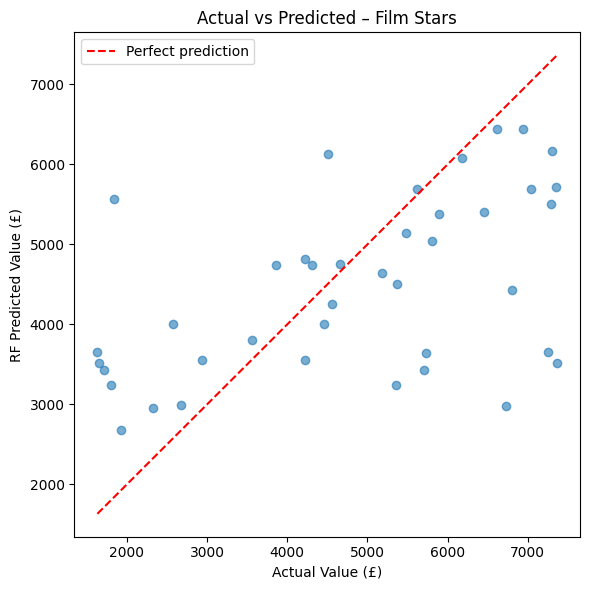

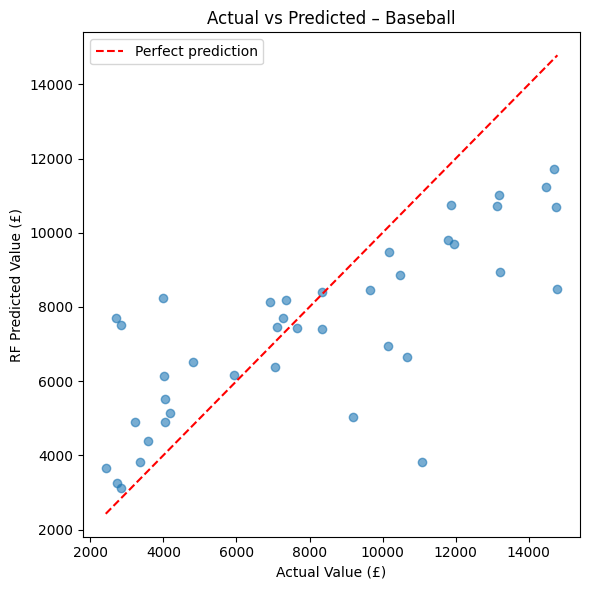

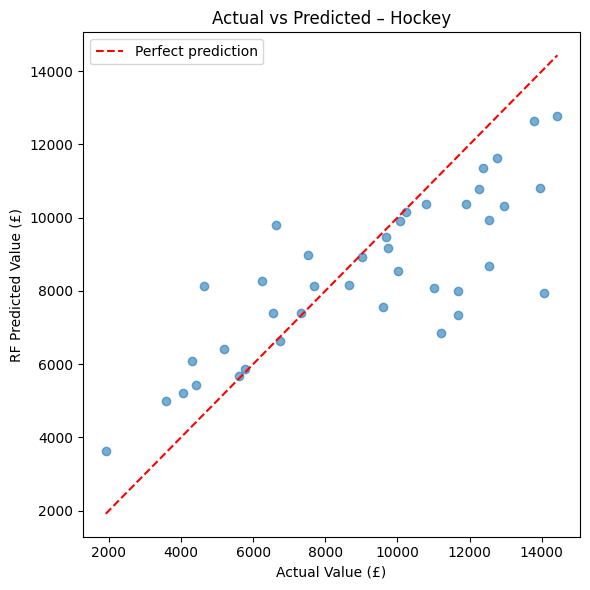

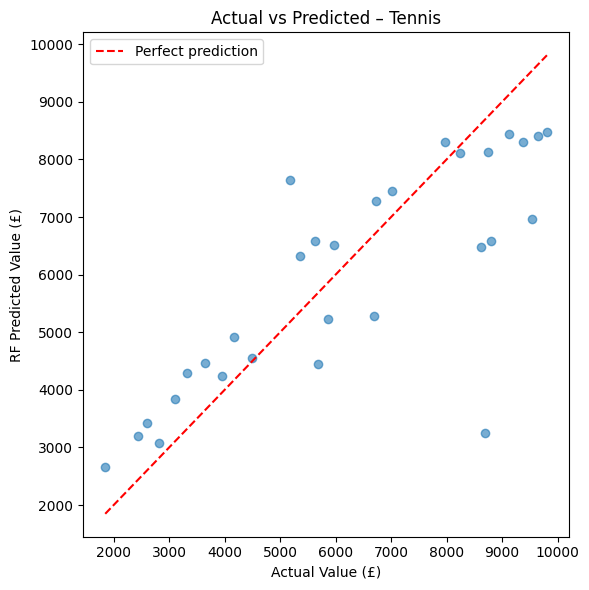

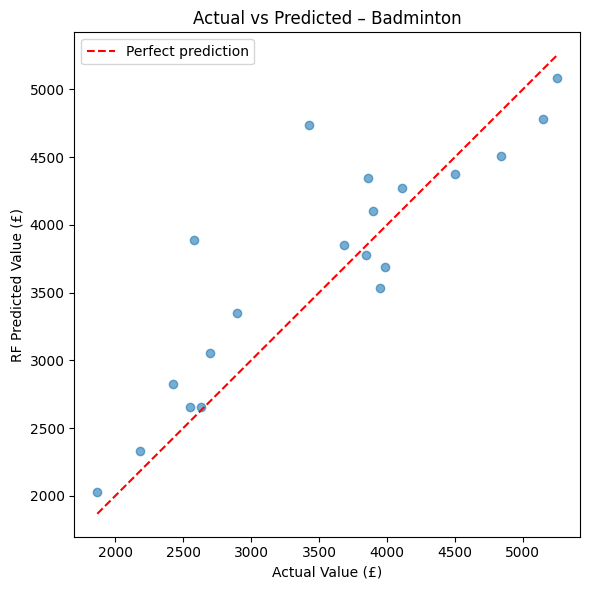

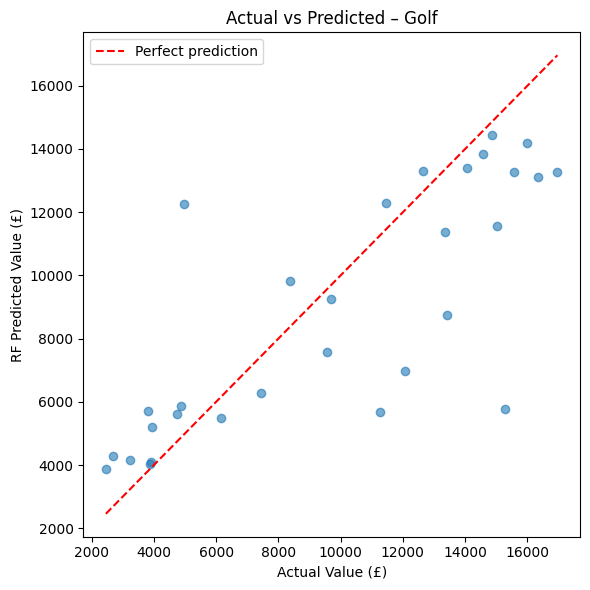

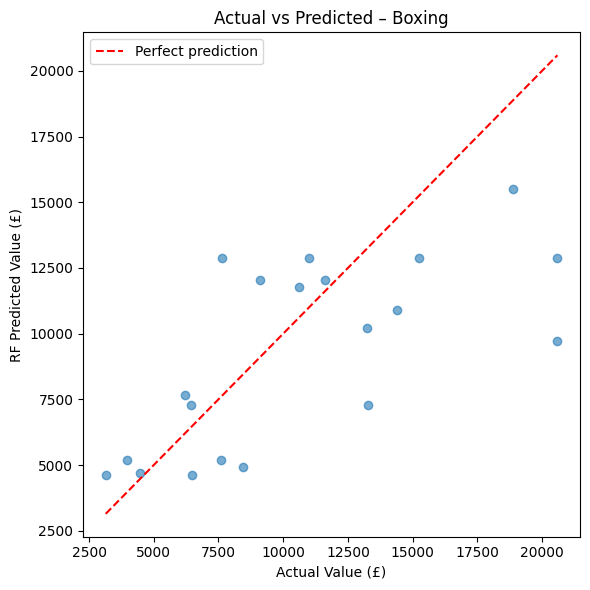

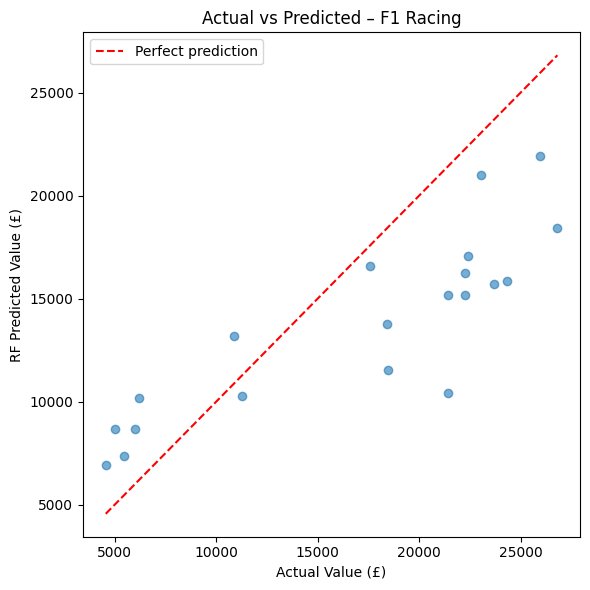

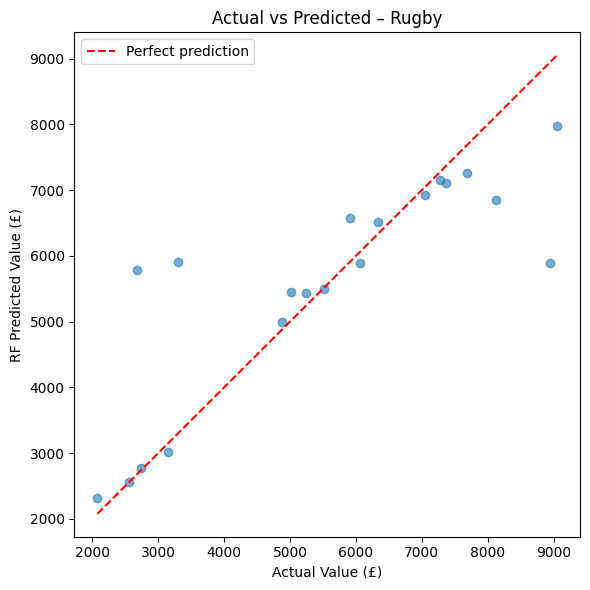

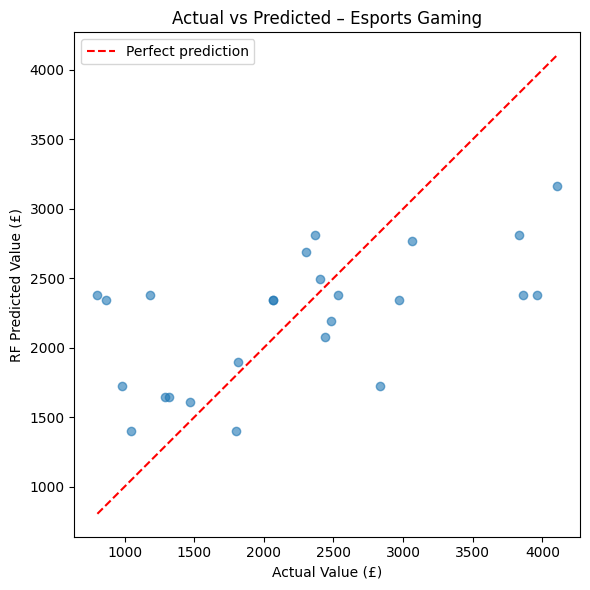

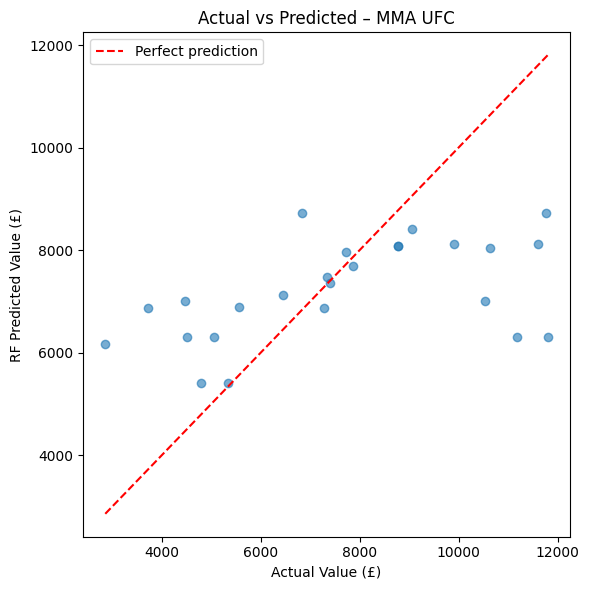

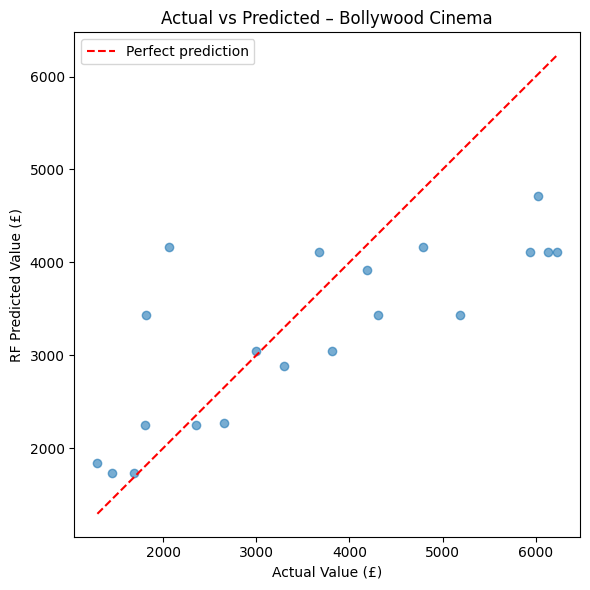

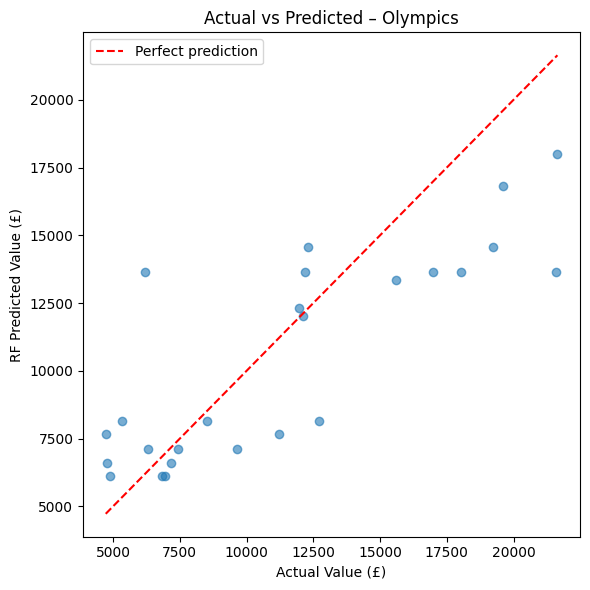

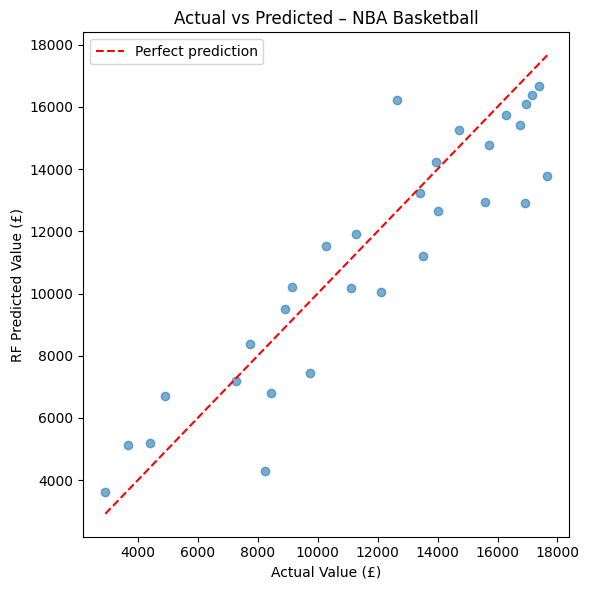

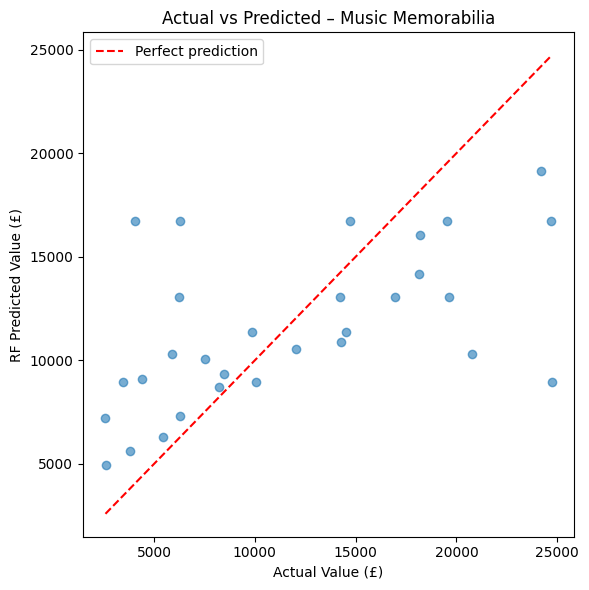

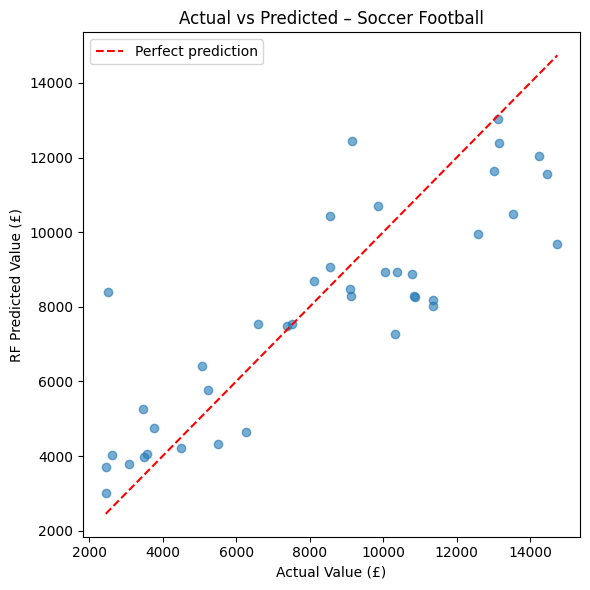

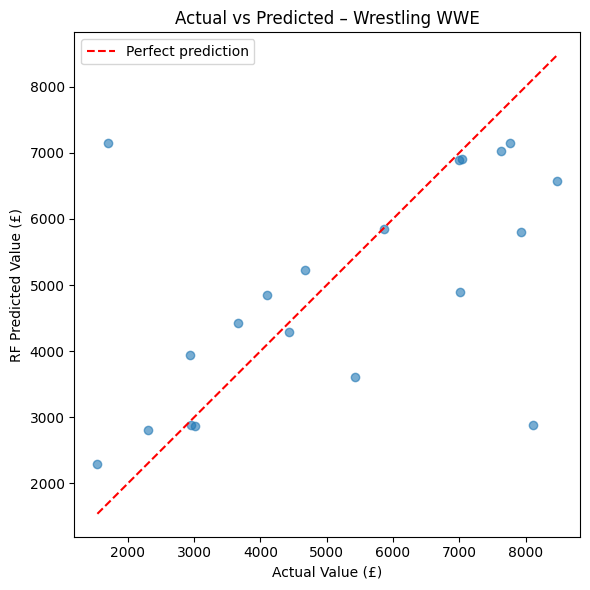

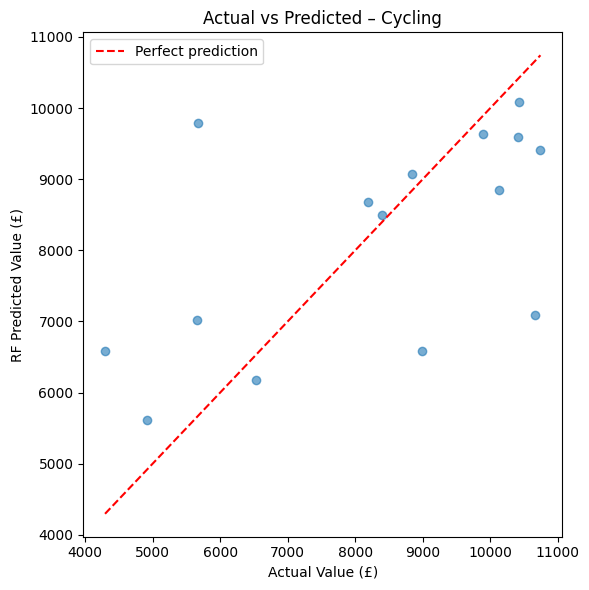

In [155]:
import matplotlib.pyplot as plt

for cat, df_cat in categorydfs.items():
    if 'RF_Predicted_Value' not in df_cat.columns:
        continue

    plt.figure(figsize=(6, 6))
    plt.scatter(df_cat['Value (£)'], df_cat['RF_Predicted_Value'], alpha=0.6)
    mn, mx = df_cat['Value (£)'].min(), df_cat['Value (£)'].max()
    plt.plot([mn, mx], [mn, mx], 'r--', label='Perfect prediction')
    plt.xlabel('Actual Value (£)')
    plt.ylabel('RF Predicted Value (£)')
    plt.title(f'Actual vs Predicted – {cat}')
    plt.legend()
    plt.tight_layout()
    plt.show()


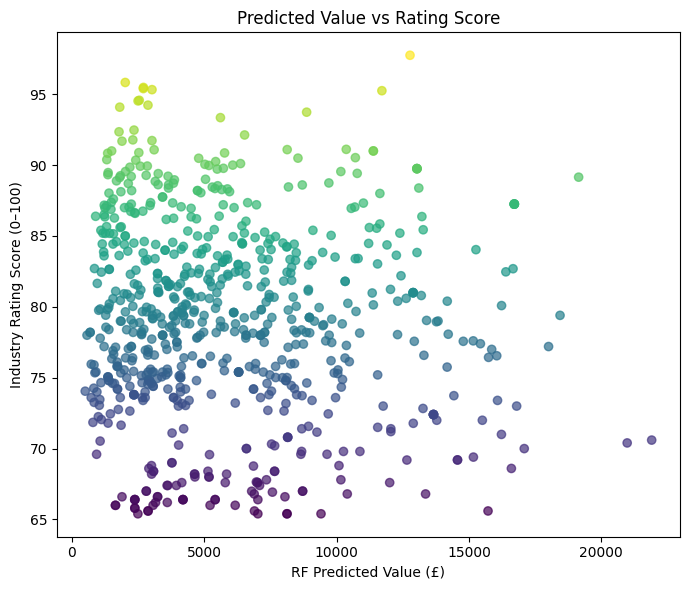

In [156]:
plt.figure(figsize=(7, 6))
plt.scatter(
    final_view['RF_Predicted_Value'],
    final_view['Industry_Rating_Score'],
    alpha=0.7,
    c=final_view['Industry_Rating_Score'],
    cmap='viridis'
)
plt.xlabel('RF Predicted Value (£)')
plt.ylabel('Industry Rating Score (0–100)')
plt.title('Predicted Value vs Rating Score')
plt.tight_layout()
plt.show()


In [157]:
pip install streamlit



SyntaxError: invalid syntax (2334867191.py, line 1)

In [5]:
# ============================================
# SAVE TRAINED MODEL (ALL CATEGORIES COMBINED)
# ============================================

import pickle
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor

# Create models directory
Path('models').mkdir(exist_ok=True)

# Load your data
df = pd.read_excel('Collectivault_data.xlsx')

print(f"📊 Total data: {len(df)} rows")

# Prepare features
feature_cols = ['ConditionScore', 'SignedScore', 'WornScore', 
                'HistoricalScore', 'MarketDemandScore']

X = df[feature_cols]
y = df['Value']

# Train Random Forest on ALL data
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X, y)

print("✅ Model trained on all data")

# Save one model for all categories
model_path = 'models/collectivault_all_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(rf_model, f)

print(f"💾 Saved: {model_path}")

# Also save individual copies for each category (same model, different names)
categories = df['Category'].unique()
for category in categories:
    category_clean = category.lower().replace(' ', '_')
    cat_model_path = f'models/{category_clean}_model.pkl'
    
    with open(cat_model_path, 'wb') as f:
        pickle.dump(rf_model, f)
    
    print(f"✅ Saved: {cat_model_path}")

print(f"\n🎉 Total models saved: {len(categories) + 1}")
print("\n✓ Now run your GUI!")


📊 Total data: 10 rows


KeyError: 'Value'

In [5]:
# ============================================
# SAVE TRAINED MODEL (ALL CATEGORIES COMBINED)
# ============================================

import pickle
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor

# Create models directory
Path('models').mkdir(exist_ok=True)

# Load your data
df = pd.read_excel('Collectivault_data.xlsx')

print(f"📊 Total data: {len(df)} rows")

# Prepare features
feature_cols = ['ConditionScore', 'SignedScore', 'WornScore', 
                'HistoricalScore', 'MarketDemandScore']

X = df[feature_cols]
y = df['Value']

# Train Random Forest on ALL data
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X, y)

print("✅ Model trained on all data")

# Save one model for all categories
model_path = 'models/collectivault_all_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(rf_model, f)

print(f"💾 Saved: {model_path}")

# Also save individual copies for each category (same model, different names)
categories = df['Category'].unique()
for category in categories:
    category_clean = category.lower().replace(' ', '_')
    cat_model_path = f'models/{category_clean}_model.pkl'
    
    with open(cat_model_path, 'wb') as f:
        pickle.dump(rf_model, f)
    
    print(f"✅ Saved: {cat_model_path}")

print(f"\n🎉 Total models saved: {len(categories) + 1}")
print("\n✓ Now run your GUI!")


📊 Total data: 10 rows


KeyError: 'Value'

In [8]:
# Check actual column names first
print("Column names:", df.columns.tolist())

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Now proceed
feature_cols = ['ConditionScore', 'SignedScore', 'WornScore', 
                'HistoricalScore', 'MarketDemandScore']

X = df[feature_cols]
y = df['Value (£)']
  # This will work now

# Train Random Forest on ALL data
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X, y)

print("✅ Model trained")

# Save models
Path('models').mkdir(exist_ok=True)

model_path = 'models/collectivault_all_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(rf_model, f)

categories = df['Category'].unique()
for category in categories:
    category_clean = category.lower().replace(' ', '_')
    with open(f'models/{category_clean}_model.pkl', 'wb') as f:
        pickle.dump(rf_model, f)
    print(f"✅ {category_clean}_model.pkl")

print(f"\n🎉 Done! {len(categories)} models saved")


Column names: ['ID', 'Item', 'Category', 'Value (£)', 'RF_Predicted_Value', 'ConditionScore', 'SignedScore', 'WornScore', 'HistoricalScore', 'MarketDemandScore', 'Industry_Rating_Score', 'Industry_Rating_Band', 'Optimized_Rating_Score', 'Optimized_Rating_Band']
✅ Model trained
✅ hockey_model.pkl
✅ baseball_model.pkl
✅ cricket_medals_model.pkl
✅ cricket_other_items_model.pkl
✅ f1_racing_model.pkl
✅ cricket_bats_model.pkl
✅ badminton_model.pkl

🎉 Done! 7 models saved
